<a href="https://colab.research.google.com/github/sarmishtahari/DS/blob/master/Assignment_37.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE- 221710309053-Hari Sarmishta

## Question:
  Try Digit recognition with Two different ANN’s. Fit the models with 5 epochs.

  Choose the best one.

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [3]:
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)
print(test_digits.shape)

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [4]:
import pandas as pd
pd.Series(train_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 60000, dtype: uint8>

In [5]:
pd.Series(test_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Length: 10000, dtype: uint8>

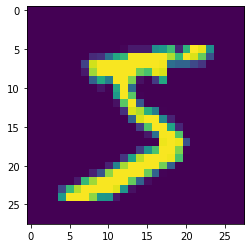

In [6]:
plt.imshow(train_digits[0])

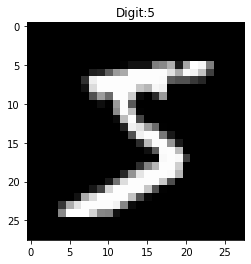

In [7]:
plt.title("Digit:"+str(train_labels[0]))
plt.imshow(train_digits[0],cmap="gray")

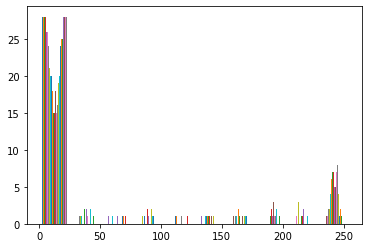

In [8]:
plt.hist(train_digits[0])
plt.show()

In [9]:
sample=np.random.randint(train_digits.shape[0],size=16)
sample

array([29469, 43450, 10203, 29514, 34163, 56794, 28420,  4821, 38743,
       37403,  8630, 46733, 27692, 15634, 55211, 49409])

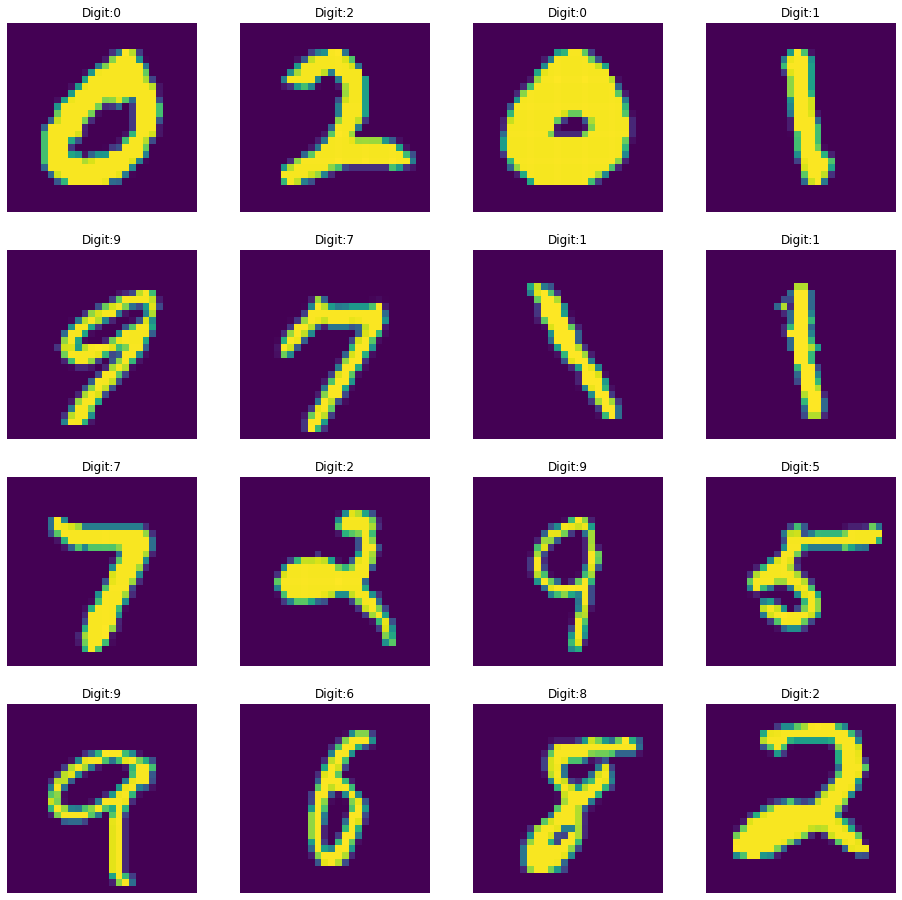

In [11]:
plt.figure(figsize=(16,16))
j=1
for i in sample:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit:"+str(train_labels[i]))
  plt.axis("off")
  j=j+1

In [12]:
train_digits_sc=train_digits/255.0
test_digits_sc=test_digits/255.0

In [13]:
from keras.utils import to_categorical

In [14]:
train_labels_cat=to_categorical(train_labels)

In [15]:
test_labels_cat=to_categorical(test_labels)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


In [17]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
# first layer we need to mention the input shape

model.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model.add(Dense(128,activation='relu'))# 784 * 128+128
model.add(Dense(128,activation='relu'))# 
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
#Final layer
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

In [18]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [19]:
history=model.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 108us/step - loss: 0.2492 - accuracy: 0.9241 - val_loss: 0.1546 - val_accuracy: 0.9562
Epoch 2/5
54000/54000 [==============================] - 6s 102us/step - loss: 0.1123 - accuracy: 0.9665 - val_loss: 0.1193 - val_accuracy: 0.9655
Epoch 3/5
54000/54000 [==============================] - 6s 102us/step - loss: 0.0830 - accuracy: 0.9749 - val_loss: 0.1153 - val_accuracy: 0.9703
Epoch 4/5
54000/54000 [==============================] - 5s 101us/step - loss: 0.0653 - accuracy: 0.9798 - val_loss: 0.1193 - val_accuracy: 0.9692
Epoch 5/5
54000/54000 [==============================] - 5s 101us/step - loss: 0.0545 - accuracy: 0.9831 - val_loss: 0.1178 - val_accuracy: 0.9705


In [20]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 30us/step


[0.10427583951104898, 0.972100019454956]

In [21]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [22]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[5.4371267e-08, 1.3049969e-05, 8.6766180e-05, 4.9905328e-05,
        2.8698642e-07, 2.9520336e-07, 9.6322075e-11, 9.9980193e-01,
        4.7005139e-07, 4.7237205e-05]], dtype=float32)

In [23]:
model.predict(test_digits_sc[:10])

array([[5.43711636e-08, 1.30499311e-05, 8.67661802e-05, 4.99052767e-05,
        2.86985852e-07, 2.95201971e-07, 9.63224361e-11, 9.99801934e-01,
        4.70050082e-07, 4.72371139e-05],
       [8.76859089e-12, 1.19079303e-07, 9.99999523e-01, 6.00567489e-08,
        7.44016376e-11, 2.30114128e-09, 5.26734418e-13, 2.69429933e-07,
        2.12737897e-10, 1.88213616e-12],
       [1.17281115e-06, 9.99565184e-01, 1.96465971e-05, 1.17781765e-05,
        5.13667146e-05, 1.16852025e-05, 6.44217516e-06, 9.99269614e-05,
        2.22199305e-04, 1.06807720e-05],
       [9.99967217e-01, 3.82839715e-09, 1.25459328e-05, 3.88910848e-07,
        1.63662025e-06, 1.32029515e-06, 5.58082684e-06, 4.98311721e-08,
        2.77149297e-07, 1.08867462e-05],
       [8.31990837e-05, 1.17816862e-05, 1.16809527e-03, 4.09266841e-06,
        9.94410455e-01, 1.27296416e-05, 9.81757112e-05, 9.45704742e-05,
        4.03439080e-05, 4.07648552e-03],
       [2.27331569e-07, 9.99612510e-01, 4.41203201e-06, 5.63991671e-06,
   

In [24]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [25]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[5.4371267e-08, 1.3049969e-05, 8.6766180e-05, 4.9905328e-05,
        2.8698642e-07, 2.9520336e-07, 9.6322075e-11, 9.9980193e-01,
        4.7005139e-07, 4.7237205e-05]], dtype=float32)

In [26]:
history.history

{'accuracy': [0.9240556, 0.96653706, 0.9749445, 0.97977775, 0.9831296],
 'loss': [0.24923825980391767,
  0.11233952633374267,
  0.08300701267748244,
  0.06532589496799779,
  0.05446567139949615],
 'val_accuracy': [0.956166684627533,
  0.965499997138977,
  0.9703333377838135,
  0.9691666960716248,
  0.9704999923706055],
 'val_loss': [0.1545579556673765,
  0.11926744146396716,
  0.11533063688191275,
  0.1193272042372264,
  0.11775486341739694]}

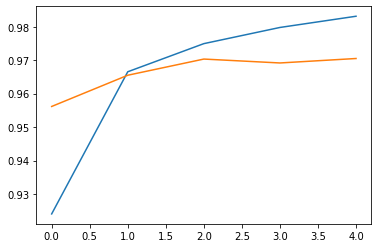

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [28]:
model1 = Sequential()
# first layer we need to mention the input shape

model1.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model1.add(Dense(128,activation='relu'))# 784 * 128+128
model1.add(Dense(256,activation='relu'))# 
model1.add(Dense(64,activation='relu'))
model1.add(Dense(256,activation='relu'))
#Final layer
model1.add(Dense(10,activation='sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 169,162
Trainable params: 169,162
Non-trainable params: 0
________________________________________________

In [29]:
model1.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [30]:
history=model1.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 6s 111us/step - loss: 0.2682 - accuracy: 0.9185 - val_loss: 0.1514 - val_accuracy: 0.9570
Epoch 2/5
54000/54000 [==============================] - 6s 109us/step - loss: 0.1133 - accuracy: 0.9659 - val_loss: 0.1182 - val_accuracy: 0.9685
Epoch 3/5
54000/54000 [==============================] - 6s 109us/step - loss: 0.0800 - accuracy: 0.9760 - val_loss: 0.1008 - val_accuracy: 0.9713
Epoch 4/5
54000/54000 [==============================] - 6s 110us/step - loss: 0.0638 - accuracy: 0.9800 - val_loss: 0.0927 - val_accuracy: 0.9735
Epoch 5/5
54000/54000 [==============================] - 6s 109us/step - loss: 0.0521 - accuracy: 0.9835 - val_loss: 0.1145 - val_accuracy: 0.9703


In [31]:
model1.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 30us/step


[0.11036076119780773, 0.9695000052452087]

In [32]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [33]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[5.4371267e-08, 1.3049969e-05, 8.6766180e-05, 4.9905328e-05,
        2.8698642e-07, 2.9520336e-07, 9.6322075e-11, 9.9980193e-01,
        4.7005139e-07, 4.7237205e-05]], dtype=float32)

In [34]:
model.predict(test_digits_sc[:10])

array([[5.43711636e-08, 1.30499311e-05, 8.67661802e-05, 4.99052767e-05,
        2.86985852e-07, 2.95201971e-07, 9.63224361e-11, 9.99801934e-01,
        4.70050082e-07, 4.72371139e-05],
       [8.76859089e-12, 1.19079303e-07, 9.99999523e-01, 6.00567489e-08,
        7.44016376e-11, 2.30114128e-09, 5.26734418e-13, 2.69429933e-07,
        2.12737897e-10, 1.88213616e-12],
       [1.17281115e-06, 9.99565184e-01, 1.96465971e-05, 1.17781765e-05,
        5.13667146e-05, 1.16852025e-05, 6.44217516e-06, 9.99269614e-05,
        2.22199305e-04, 1.06807720e-05],
       [9.99967217e-01, 3.82839715e-09, 1.25459328e-05, 3.88910848e-07,
        1.63662025e-06, 1.32029515e-06, 5.58082684e-06, 4.98311721e-08,
        2.77149297e-07, 1.08867462e-05],
       [8.31990837e-05, 1.17816862e-05, 1.16809527e-03, 4.09266841e-06,
        9.94410455e-01, 1.27296416e-05, 9.81757112e-05, 9.45704742e-05,
        4.03439080e-05, 4.07648552e-03],
       [2.27331569e-07, 9.99612510e-01, 4.41203201e-06, 5.63991671e-06,
   

In [35]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [36]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[5.4371267e-08, 1.3049969e-05, 8.6766180e-05, 4.9905328e-05,
        2.8698642e-07, 2.9520336e-07, 9.6322075e-11, 9.9980193e-01,
        4.7005139e-07, 4.7237205e-05]], dtype=float32)

In [37]:
history.history

{'accuracy': [0.91848147, 0.9658889, 0.976037, 0.98003703, 0.983537],
 'loss': [0.2682286804870323,
  0.11327024337511371,
  0.07996222927828354,
  0.06384187343745941,
  0.05210273787287857],
 'val_accuracy': [0.9570000171661377,
  0.968500018119812,
  0.9713333249092102,
  0.9735000133514404,
  0.9703333377838135],
 'val_loss': [0.1514195862809817,
  0.11823102414111296,
  0.10078862232714891,
  0.09272156656036774,
  0.11449944407244524]}

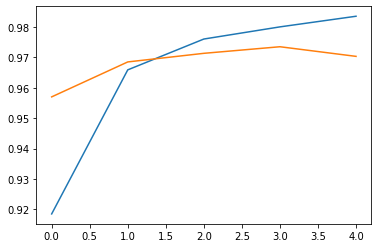

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])